In [36]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [18]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.0.0
accelerate                   0.29.2
aiohttp                      3.9.3
aiosignal                    1.3.1
altgraph                     0.17.2
anyio                        4.3.0
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.7.2
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.7.0
boto3                        1.34.81
botocore                     1.34.81
Brotli                       1.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                        

In [19]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [20]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
import cv2
import imghdr

In [22]:
data_dir = "data"

In [23]:
image_exts = {"png", "jpg", "jpeg", "bmp"}

In [25]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                img_type = imghdr.what(image_path)
                if img_type not in image_exts:
                    print(f"Image not in ext list {image_path}")
                    os.remove(image_path)
            except Exception as e:
                print(f"Issue with image {image_path}")
                # Optionally remove the problematic file
                # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [27]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [28]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 445 files belonging to 2 classes.


In [29]:
data_iteretaor = data.as_numpy_iterator()

In [30]:
data_iteretaor

In [31]:
batch = data_iteretaor.next()

2024-04-24 19:19:23.505056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 19:19:23.806126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 19:19:23.967790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [33]:
batch

(array([[[[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          ...,
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ]],
 
         [[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          ...,
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ]],
 
         [[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          ...,
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ]],
 
         ...,
 
         [[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.    

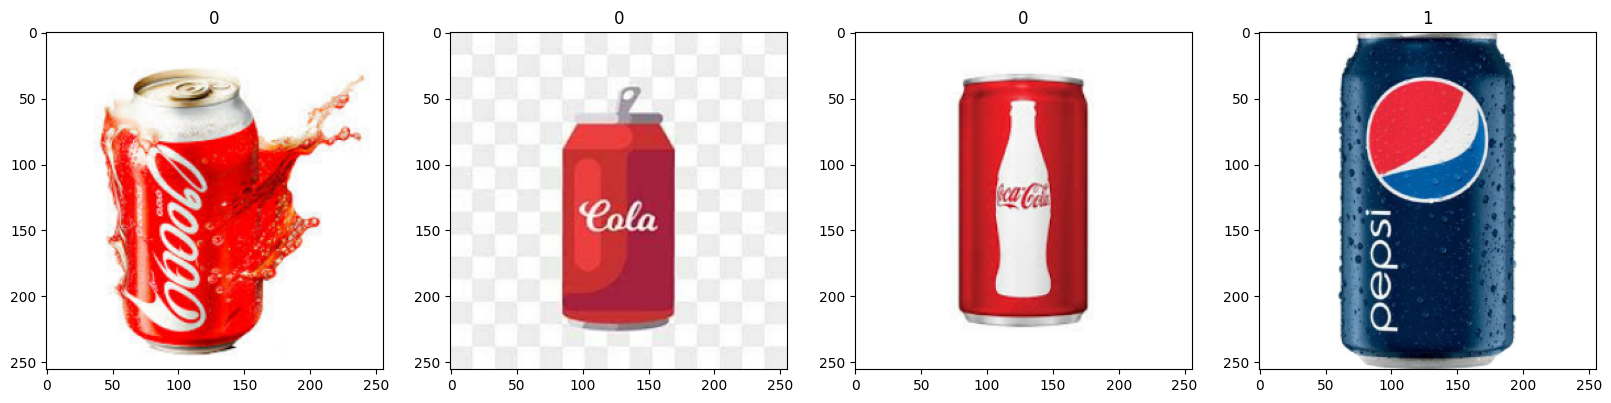

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 0 : Coca-Cola
Class 1 : Pepsi

In [38]:
### Data Scaling
data = data.map(lambda x, y: (x / 255, y))

In [39]:
data.as_numpy_iterator().next()

2024-04-24 19:57:10.006570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 19:57:10.294703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 19:57:10.457960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

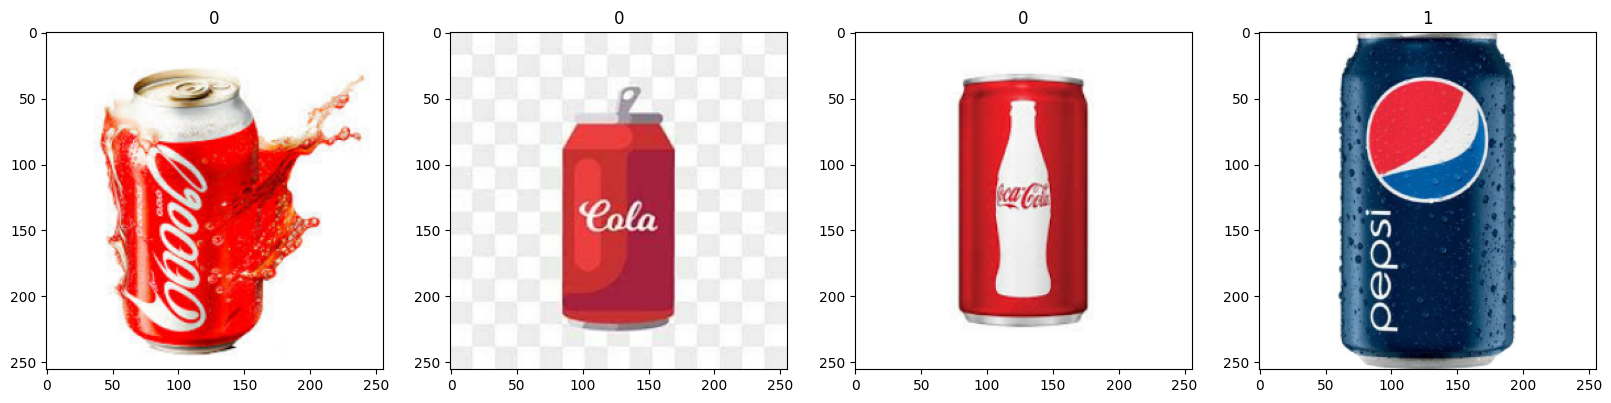

In [40]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [77]:
data_length = len(data)

In [78]:
train_size = int(data_length * 0.7)
val_size = int(data_length * 0.2)
test_size = data_length - train_size - val_size

In [79]:
train_size + val_size + test_size

14

In [80]:
val_size

2

In [81]:
test_size

3

In [82]:
train_size

9

In [83]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [87]:
len(test)

3

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential(
    [
        Conv2D(
            16, (3, 3), padding="same", activation="relu", input_shape=(256, 256, 3)
        ),
        MaxPooling2D(),
        Conv2D(32, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(16, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(256, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile the model (example)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 16)       

In [101]:
logdir = "logs"

In [102]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [103]:
hist = model.fit(
    train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]
)

Epoch 1/20


2024-04-24 20:59:10.947328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-04-24 20:59:10.993470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:11.286183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:11.450554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 1.8904 - accuracy: 0.5660

2024-04-24 20:59:14.783184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:15.060892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:15.222800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 126ms/step - loss: 1.8904 - accuracy: 0.5660 - val_loss: 1.0699 - val_accuracy: 0.3125
Epoch 2/20


2024-04-24 20:59:15.536287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 3s - loss: 1.0913 - accuracy: 0.2812

2024-04-24 20:59:15.815033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:15.972034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.5676 - accuracy: 0.6667

2024-04-24 20:59:16.306420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:16.583756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:16.740814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.5676 - accuracy: 0.6667 - val_loss: 0.4413 - val_accuracy: 0.7656
Epoch 3/20


2024-04-24 20:59:17.015326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 3s - loss: 0.4698 - accuracy: 0.8125

2024-04-24 20:59:17.295768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:17.452528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.3106 - accuracy: 0.8681

2024-04-24 20:59:17.789753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:18.067131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:18.225477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 125ms/step - loss: 0.3106 - accuracy: 0.8681 - val_loss: 0.2001 - val_accuracy: 0.9375
Epoch 4/20


2024-04-24 20:59:18.493042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 3s - loss: 0.3073 - accuracy: 0.9375

2024-04-24 20:59:18.774326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:18.933771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1972 - accuracy: 0.9410

2024-04-24 20:59:19.272558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:19.551925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:19.713181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 126ms/step - loss: 0.1972 - accuracy: 0.9410 - val_loss: 0.3577 - val_accuracy: 0.8906
Epoch 5/20


2024-04-24 20:59:19.984467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 3s - loss: 0.2166 - accuracy: 0.9062

2024-04-24 20:59:20.264330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:20.423671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1816 - accuracy: 0.9618

2024-04-24 20:59:20.760172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:21.041294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:21.201007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 126ms/step - loss: 0.1816 - accuracy: 0.9618 - val_loss: 0.0652 - val_accuracy: 0.9688
Epoch 6/20


2024-04-24 20:59:21.473618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 3s - loss: 0.1131 - accuracy: 0.9688

2024-04-24 20:59:21.757408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:21.918801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1511 - accuracy: 0.9722

2024-04-24 20:59:22.257286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:22.537641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:22.698559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 126ms/step - loss: 0.1511 - accuracy: 0.9722 - val_loss: 0.0666 - val_accuracy: 0.9844
Epoch 7/20


2024-04-24 20:59:22.975155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:23.258135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:23.423796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0858 - accuracy: 0.9826

2024-04-24 20:59:23.758155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:24.046742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:24.211975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 127ms/step - loss: 0.0858 - accuracy: 0.9826 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 8/20


2024-04-24 20:59:24.483713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 3s - loss: 0.3323 - accuracy: 0.9688

2024-04-24 20:59:24.768061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:24.928957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9861

2024-04-24 20:59:25.267154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:25.554405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:25.716416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 127ms/step - loss: 0.0784 - accuracy: 0.9861 - val_loss: 0.0762 - val_accuracy: 0.9688
Epoch 9/20


2024-04-24 20:59:25.993629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:26.283143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:26.447724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.9757

2024-04-24 20:59:26.784429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:27.071171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:27.235807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 127ms/step - loss: 0.0992 - accuracy: 0.9757 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 10/20


2024-04-24 20:59:27.509440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 3s - loss: 0.1531 - accuracy: 0.9688

2024-04-24 20:59:27.797644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:27.961615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0743 - accuracy: 0.9861

2024-04-24 20:59:28.299370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:28.590092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:28.753920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 128ms/step - loss: 0.0743 - accuracy: 0.9861 - val_loss: 0.0445 - val_accuracy: 0.9844
Epoch 11/20


2024-04-24 20:59:29.028506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:29.318198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:29.484157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0752 - accuracy: 0.9861

2024-04-24 20:59:29.823590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:30.118081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:30.287184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 131ms/step - loss: 0.0752 - accuracy: 0.9861 - val_loss: 0.1496 - val_accuracy: 0.9531
Epoch 12/20


2024-04-24 20:59:30.576781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:30.872814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:31.038148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0999 - accuracy: 0.9826

2024-04-24 20:59:31.378910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:31.668339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:31.834131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 128ms/step - loss: 0.0999 - accuracy: 0.9826 - val_loss: 0.0373 - val_accuracy: 0.9844
Epoch 13/20


2024-04-24 20:59:32.108361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 3s - loss: 0.0222 - accuracy: 1.0000

2024-04-24 20:59:32.396076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:32.561657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9931

2024-04-24 20:59:32.899009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:33.185897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:33.351341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 128ms/step - loss: 0.0581 - accuracy: 0.9931 - val_loss: 0.0833 - val_accuracy: 0.9688
Epoch 14/20


2024-04-24 20:59:33.628171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:33.915811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:34.083702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0795 - accuracy: 0.9792

2024-04-24 20:59:34.423495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:34.710226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:34.876477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 128ms/step - loss: 0.0795 - accuracy: 0.9792 - val_loss: 0.0761 - val_accuracy: 0.9688
Epoch 15/20


2024-04-24 20:59:35.153156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:35.441616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:35.610015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9792

2024-04-24 20:59:35.956287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:36.247294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:36.413655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 129ms/step - loss: 0.0706 - accuracy: 0.9792 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 16/20


2024-04-24 20:59:36.688957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 3s - loss: 0.1173 - accuracy: 0.9688

2024-04-24 20:59:36.983766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:37.150791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9896

2024-04-24 20:59:37.497832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:37.790409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:37.955242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 130ms/step - loss: 0.0518 - accuracy: 0.9896 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 17/20


2024-04-24 20:59:38.238032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:38.526736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:38.692682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9931

2024-04-24 20:59:39.035993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:39.327656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:39.494245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 130ms/step - loss: 0.0336 - accuracy: 0.9931 - val_loss: 0.1109 - val_accuracy: 0.9531
Epoch 18/20


2024-04-24 20:59:39.775781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:40.069788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:40.236804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9896

2024-04-24 20:59:40.586619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:40.879279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:41.046066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 130ms/step - loss: 0.0255 - accuracy: 0.9896 - val_loss: 0.0866 - val_accuracy: 0.9688
Epoch 19/20


2024-04-24 20:59:41.326235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:41.615264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:41.781530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1047 - accuracy: 0.9826

2024-04-24 20:59:42.119805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:42.407300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:42.570391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 127ms/step - loss: 0.1047 - accuracy: 0.9826 - val_loss: 0.0289 - val_accuracy: 0.9844
Epoch 20/20


2024-04-24 20:59:42.844051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/9 [==>...........................] - ETA: 3s - loss: 0.0129 - accuracy: 1.0000

2024-04-24 20:59:43.130827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:43.297383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0990 - accuracy: 0.9722

2024-04-24 20:59:43.636656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:43.926164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 20:59:44.091077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 128ms/step - loss: 0.0990 - accuracy: 0.9722 - val_loss: 0.2164 - val_accuracy: 0.9375


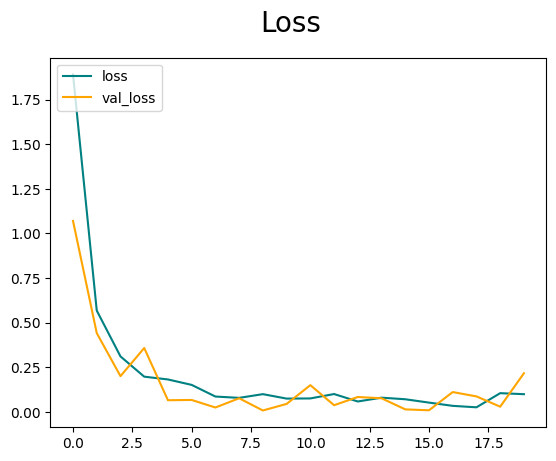

In [104]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

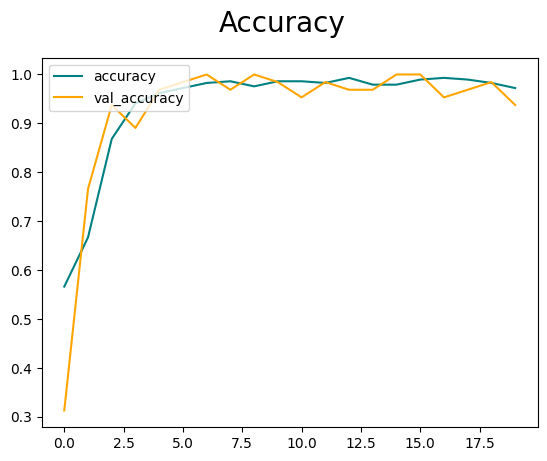

In [105]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [106]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [107]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [108]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-04-24 21:00:46.695400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:00:46.981021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:00:47.142660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 1s 509ms/step


In [109]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9705882, shape=(), dtype=float32) tf.Tensor(0.9892473, shape=(), dtype=float32)


In [112]:
import cv2

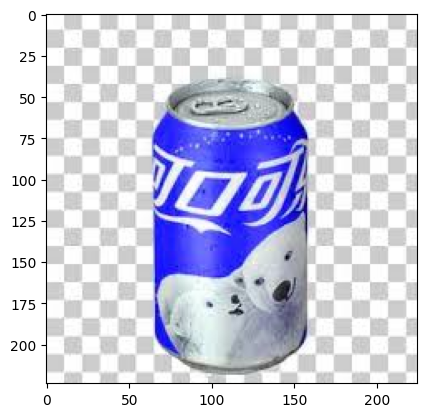

In [113]:
img = cv2.imread("Data/coke/images8.jpg")
plt.imshow(img)
plt.show()

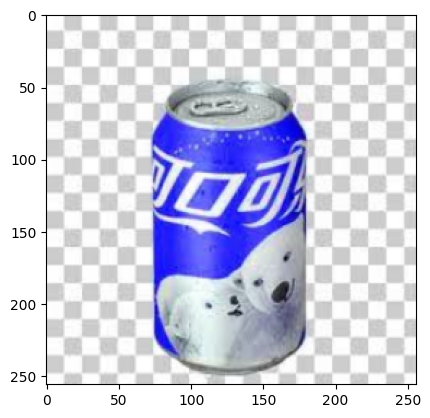

In [114]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [115]:
yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 1s 573ms/step


In [117]:
if yhat > 0.5:
    print(f"Predicted class is Coke")
else:
    print(f"Predicted class is Pepsi")

Predicted class is Coke
